# ARIMA 

## Overview
**ARIMA** (AutoRegressive Integrated Moving Average) is a statistical model used for time series forecasting. It combines three components:

  1. **AR (Auto Regressive)** - correlation to past values
  2. **I (Integrated)** - differencing to make time series stationary 
  3. **MA (Moving Average)** - past errors  

It is a statistical model used to forecast future values based on the influence of the past values on the present values.  

# Packages to install
conda install conda-forge::scikit-learn  
conda install -c conda-forge pmdarima

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import (
    mean_absolute_error,
    root_mean_squared_error,
    mean_absolute_percentage_error)
from sklearn.model_selection import ParameterGrid

# Load and check stationarity 

ARIMA requires the time series to be **stationary** (constant mean and variance over time).  

We use the the **Augmented Dickey_Full (ADF)** test check if the timeseries is stationary.  
- The H0 (null hypothesis): the time series is NOT stationary.   
- The H1 (alternative hypthesis): the time series is stationary  
- If **p-value <= 0.05**, reject H0 and treat the time sereies as stationary

In [2]:
#import the dataset and set the index to time creating a another df
df = pd.read_csv("AUS monthly beer production.csv", index_col=0, parse_dates=True)
df

,value
time,
1956-01-01,284.000000
1956-02-01,253.444206
1956-03-01,230.185302
1956-04-01,213.000000
1956-05-01,205.676860
...,...
2009-12-01,469.744786
2010-01-01,414.000000
2010-02-01,331.991312


<Figure size 1200x500 with 0 Axes>

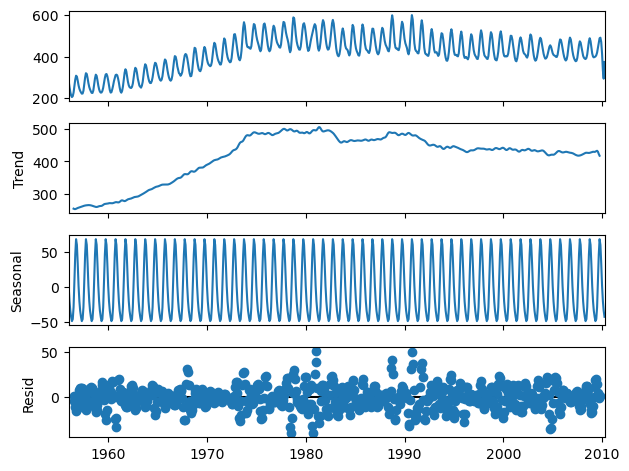

In [3]:
# plot the data to check if the time series is stationary

plt.figure(figsize=(12, 5))

decompose = seasonal_decompose(
    df, 
    model="additive", 
    period =12
)

decompose.plot()
plt.show()

In [ ]:
# check stationarity with ADF test

def check_stationarity(df): 
  result = adfuller(df)
  if result[1] > 0.05:
    print("The time series is not stationary")
  else:
    print("The time series is stationary")


The time series is not stationary


# ARIMA model

In statsmodels. ARIMA is denoted as (p, d, q), where:
- **p** = number of lags or autoregressive terms. It refers to the number of past observations that directly infleunce the current value.   
The  number is identified by **PACF**  

- **d** = number of differentiating. It represents the number of differences need to make the time series stationsry. Usually: 0 ≤ d ≤ 2  
  
- **q** = order of moving average values. It represents the number of lagged forecast errors.  
   

Package that automatically discover the optinmal number of ARIMA's parameters: [auto_arima](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html)

**Key assumptions**:
1. The time series can be made stationary through differencing
2. Past values and past errors contain information useful for forecasting
3. The relationship between past and present is linear

## Train/Test Split

We split the data into 70% training and 30% testing sets.


In [5]:
# split the dataset in training and testing
train, test = df.iloc[:int(len(df)*0.7)], df.iloc[int(len(df)*0.7):]
train, test

(                 value
 time                  
 1956-01-01  284.000000
 1956-02-01  253.444206
 1956-03-01  230.185302
 1956-04-01  213.000000
 1956-05-01  205.676860
 ...                ...
 1993-08-01  443.237318
 1993-09-01  485.105528
 1993-10-01  512.000000
 1993-11-01  508.769037
 1993-12-01  483.625271
 
 [456 rows x 1 columns],
                  value
 time                  
 1994-01-01  449.000000
 1994-02-01  417.337447
 1994-03-01  395.598884
 1994-04-01  381.000000
 1994-05-01  379.650897
 ...                ...
 2009-12-01  469.744786
 2010-01-01  414.000000
 2010-02-01  331.991312
 2010-03-01  293.894955
 2010-04-01  374.000000
 
 [196 rows x 1 columns])

## Differencing

If the series is not stationary, we apply **differencing** to remove trends.

**Important**: We only difference the training data to avoid data leakage. The ARIMA model will handle differencing internally via the `d` parameter.

In [ ]:
# First difference 


# Check stationarity after differencing - use check stationarity function


The time series is stationary


## Identify ARIMA parameters p and q  
- p = number of lags 
- d = number of differencing  
- q = order of moving average

We use ACF and PACF plots on the **differenced** data to identify the `p` and `q` parameters:

| Plot | Identifies | How to read |
|------|------------|-------------|
| **ACF** | **q** (MA order) | Count significant lags before cutoff |
| **PACF** | **p** (AR order) | Count significant lags before cutoff |



**How to read the plots**:
- Count significant lags (bars exceeding the blue shaded confidence interval)
- The lag where the plot cuts off suggests the order

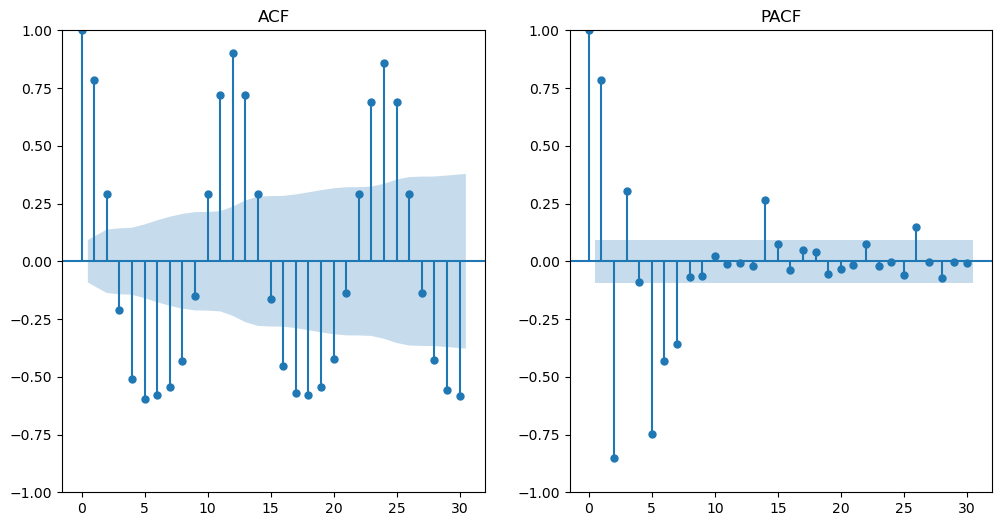

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# q - ACF [df, lags, ax=plt.gca()]
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

#p - PACF
plt.subplot(1,2,2)


plt.show()


## Fit ARIMA model and check summary of the model

Based on the ACF/PACF analysis, we select the parameters (p, d, q) and fit the model.

**Important**: Pass the **original** (non-differenced) training data to the ARIMA model. The model handles differencing internally via the `d` parameter.

**model results**  
In statsmodels. the ARIMA model is a special case of the more general 
**SARIMAX** (Seasonal ARIMA with eXogenous variable)

The SARIMAX model has four models under its hat: 
ARIMA
SARIMA
ARIMAX
SARIMAX

In [ ]:
# fit ARIMA model
# ARIMA(df, order(p, d, q))


# Display summary of the model



/opt/anaconda3/envs/CEU/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/CEU/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/CEU/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/CEU/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/CEU/lib/python3.11/site-packages/statsmodels/base/model.py:607: Converg

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  456
Model:                 ARIMA(7, 1, 1)   Log Likelihood               -1193.468
Date:                Tue, 27 Jan 2026   AIC                           2404.935
Time:                        11:00:25   BIC                           2442.018
Sample:                    01-01-1956   HQIC                          2419.544
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6892      0.113      6.125      0.000       0.469       0.910
ar.L2          0.3909      0.166      2.355      0.019       0.066       0.716
ar.L3         -1.3008      0.104    -12.504      0.000      -1.505      -1.097
ar.L4          0.2588      0.121      2.135      0.033       0.021       0.496
ar.L5          0.4013      0.137      2.931      0.003       0.133       0.670
ar.L6         -0.3577      0.081     -4.442      0.000      -0.515      -0.200
ar.L7         -0.3541      0.049     -7.180      0.000      -0.451      -0.257
ma.L1          0.7516      0.105      7.190      0.000       0.547       0.956
sigma2        10.8363      0.680     15.926      0.000       9.503      12.170
===================================================================================
Ljung-Box (L1) (Q):                   2.32   Jarque-Bera (JB):                29.33
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                             0.48
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forcasting  and model evaluation

We evaluate the model using common metrics:

| Metric | Description | How to interpret |
|--------|-------------|------------------|
| **MAE** | Mean Absolute Error - average absolute difference | Lower = better. Easy to understand as "average error" |
| **RMSE** | Root Mean Squared Error - penalizes larger errors | Lower = better. If RMSE >> MAE, large outlier errors exist |
| **MAPE** | Mean Absolute Percentage Error - percentage error | <10% = excellent,  10-20% = good,  20-50% = acceptable, >50% = poor |


In [ ]:
# Forecasting
# .forecast(steps = how many values in the future we want to predict We forecast the same length of test dataset (66))


1994-01-01    455.129002
1994-02-01    439.275169
1994-03-01    433.127663
1994-04-01    427.510619
1994-05-01    416.024006
                 ...    
2009-12-01    453.228542
2010-01-01    446.499572
2010-02-01    441.954911
2010-03-01    440.506929
2010-04-01    441.869666
Freq: MS, Name: predicted_mean, Length: 196, dtype: float64

In [14]:
# Function to plot results and evaluate model performance
def model_assessment(train, test, predictions, chart_title):
  """Plot train/test/prediction series and print common error metrics.

  Args:
      train (pd.Series): In-sample target used to fit the model.
      test (pd.Series): Holdout target used to evaluate the forecast.
      predictions (pd.Series or np.ndarray): Forecast aligned to `test` index.
      chart_title (str): Short label for the chart (e.g., model name).

  Notes
  -----
  * MAE = mean(|y - ŷ|)
  * RMSE = sqrt(mean((y - ŷ)^2))
  * MAPE = mean(|(y - ŷ)/y|). Use with care when y can be 0.
  """
  # Set the size of the plot to 10 inches by 4 inches
  plt.figure(figsize = (10,4))
  # Plot the train, test, and forecast data
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = "Forecast")
  # add title and legend to the plot
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  # Calculating the MAE, RMSE, and MAPE
  mae = mean_absolute_error(test, predictions)
  rmse = root_mean_squared_error(test, predictions)
  mape = mean_absolute_percentage_error(test, predictions)

  # Print the calculated error metrics
  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")

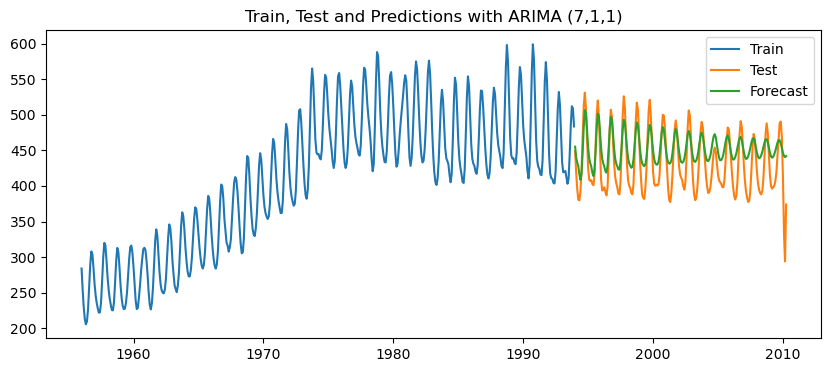

The MAE is 27.82
The RMSE is 33.40
The MAPE is 6.83 %


In [ ]:
# use model_assessment function 



## Summary

### ARIMA Workflow:

1. **Load and visualize** the time series data
2. **Split** into training (70%) and testing (30%) sets
3. **Check stationarity** using ADF test
4. **Difference** the training data if not stationary
5. **Analyze ACF/PACF** on differenced data to find p and q
6. **Fit ARIMA** model on original training data with (p, d, q)
7. **Forecast** and evaluate the model

### Key Points:

- Only difference the **training data** for ACF/PACF analysis
- Pass **original data** to ARIMA model (it handles differencing via `d`)
- Use **PACF** for AR order (p) and **ACF** for MA order (q)
- Lower **AIC/BIC** indicates better model fit

# SARIMA model
SARIMA extends ARIMA model by adding season component